In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import MultipleLocator
from scipy.io import readsav

import datetime
import matplotlib.dates as date

from matplotlib import animation, rc
from IPython.display import HTML

import sys
sys.path.append("../")
#from iris2gauss import fit2gauss
from fit2gauss import fit2gauss

In [2]:
path = '/Users/WilliamHenryAshfieldIV/dat/iris/'
filename = 'raster_data.sav'
fn = path+filename

In [3]:
ro = readsav(fn,verbose=False,python_dict=False)

In [4]:
tm = np.array(ro.d['TIME'][0])
ro.d['TIME_CCSDS'][0][0]

sttime = 53908 # observation start time in sec.
tm += sttime

dts = np.empty(len(tm), dtype = '<U15')
for i in range (0,len(tm)):
    dts[i] = str(datetime.timedelta(seconds=tm[i],milliseconds=3))
    
tmp = np.array([datetime.datetime for x in range(len(tm))])
for i in range(0,len(tm)):
    tmp[i]=datetime.datetime.strptime(dts[i],'%H:%M:%S.%f')
tm_d = date.date2num(tmp)

In [5]:
Int = ro.d['INT'][0]
wvl = ro.d['WVL'][0]
err = ro.d['ERR'][0]

data = Int[69,:,:]/4. # raster px=69, the one we want. - divide to put into DN/s
error = err[69,:,:]/4.

# trim:
jj = np.where((wvl > 1402) & (wvl < 1404))[0] 
data = data[:,jj]
error = error[:,jj]
wvl = wvl[jj]

In [6]:
it = np.arange(1200,1600) # subrange of time (in index) to fit
N = len(it)

In [7]:
v_r = np.zeros(N)
v_b = np.zeros(N)
w_r = np.zeros(N)
w_b = np.zeros(N)
amp = np.zeros(N)

y1g_arr = np.zeros((N,79))
y2a_arr = np.zeros((N,79))
y2b_arr = np.zeros((N,79))


for i in range(0,N):
    
    t_i = it[i]
    dt = data[t_i,:]
    er = error[t_i,:]
        
    res = fit2gauss(wvl,dt,er,chi_thr=40.)
    a2g = res["a2g"] # extract fit parameters
    a1g = res["a1g"]
    
    y1g_arr[i,:] = res["y1g"]
    y2a_arr[i,:] = res["y2a"]
    y2b_arr[i,:] = res["y2b"]

    #calculate Doppler velocities and wavelengths
    line = 1402.77
    c = 300.
    freq = c/line*1e3

    amp[i] = a1g[0]

    if a2g[1] < a2g[4]:
        v_b[i] = (a2g[1]-line)/line*3e5 # in km/s
        v_r[i] = (a2g[4]-line)/line*3e5

    else:
        v_r[i] = (a2g[1]-line)/line*3e5 # in km/s
        v_b[i] = (a2g[4]-line)/line*3e5

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [11]:
v_r[232] = v_b[232] # w/ quick fix..

(0.0, 50.0)

Locator attempting to generate 2355 ticks ([-25566.302789351852, ..., -25566.275543981483]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2355 ticks ([-25566.302789351852, ..., -25566.275543981483]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2355 ticks ([-25566.302789351852, ..., -25566.275543981483]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2355 ticks ([-25566.302789351852, ..., -25566.275543981483]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2355 ticks ([-25566.302789351852, ..., -25566.275543981483]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2355 ticks ([-25566.302789351852, ..., -25566.275543981483]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2355 ticks ([-25566.302789351852, ..., -25566.275543981483]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2355 ticks ([-25566.302789351852, ..., -25566

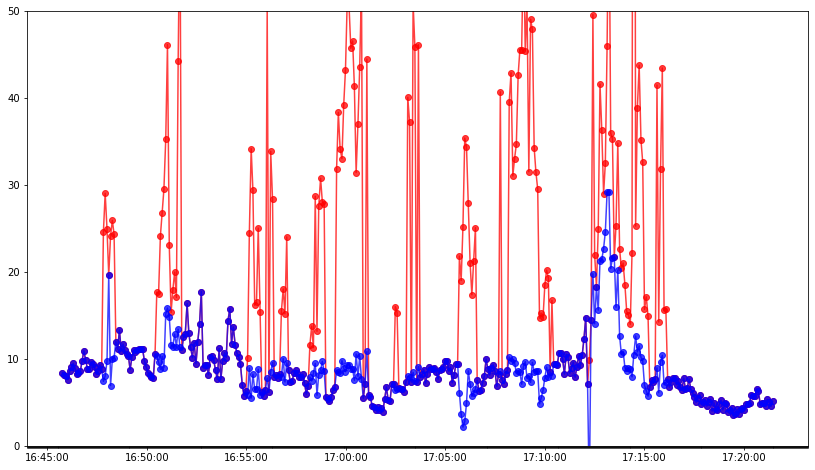

In [8]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot_date(tm_d[it],v_r,'r',alpha=0.75,marker='o')
ax.plot_date(tm_d[it],v_b,'b',alpha=0.75,marker='o')
plt.ylim(0,50)

#ax.xaxis.set_major_locator(date.MinuteLocator())
#ax.xaxis.set_major_locator(tmp[1420:1430])
ax.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))
ax.xaxis.set_minor_locator(date.SecondLocator())
#ax.xaxis.set_minor_formatter(date.DateFormatter('0.%f'))
ax.set_ylim(0,50)
#ax.set_xlim([tmp[1420], tmp[1440]])

(-25566.287890243057, -25566.28664892361)

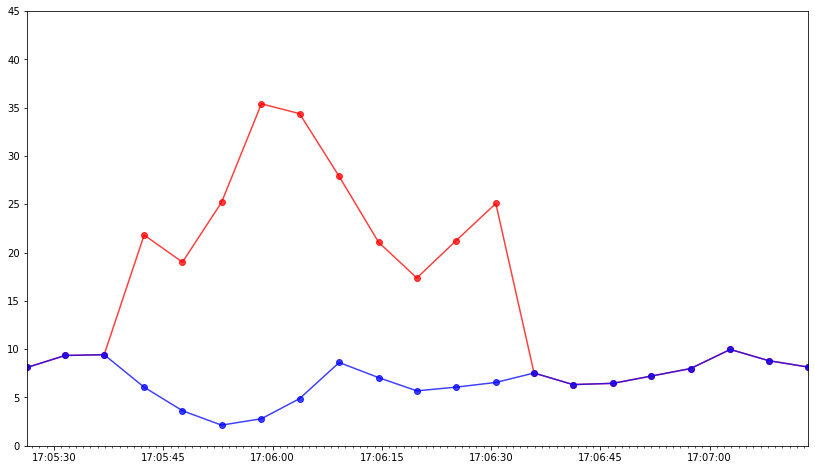

In [9]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot_date(tm_d[it],v_r,'r',alpha=0.75,marker='o')
ax.plot_date(tm_d[it],v_b,'b',alpha=0.75,marker='o')
ax.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))
ax.xaxis.set_minor_locator(date.SecondLocator())
#ax.xaxis.set_minor_formatter(date.DateFormatter('0.%f'))
ax.set_ylim(0,45)
ax.set_xlim([tmp[1420], tmp[1440]])

In [12]:
data.shape

(2040, 79)

In [13]:
datr = data[1200:1600,:]

In [14]:
y2a_arr.shape

(400, 79)

In [15]:
ts = np.arange(1424,1433)-1200
nn = len(ts)
nn

9

In [51]:
import matplotlib as mpl
import matplotlib.font_manager as fm
# Rebuild the matplotlib font cache
fm._rebuild()

mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1

clrs = ['#0051a2', '#97964a', '#ffd44f', '#f4777f', '#93003a']
clrs2 = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
clrs3 = ['#006BA4', '#FF800E', '#ABABAB', '#595959','#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

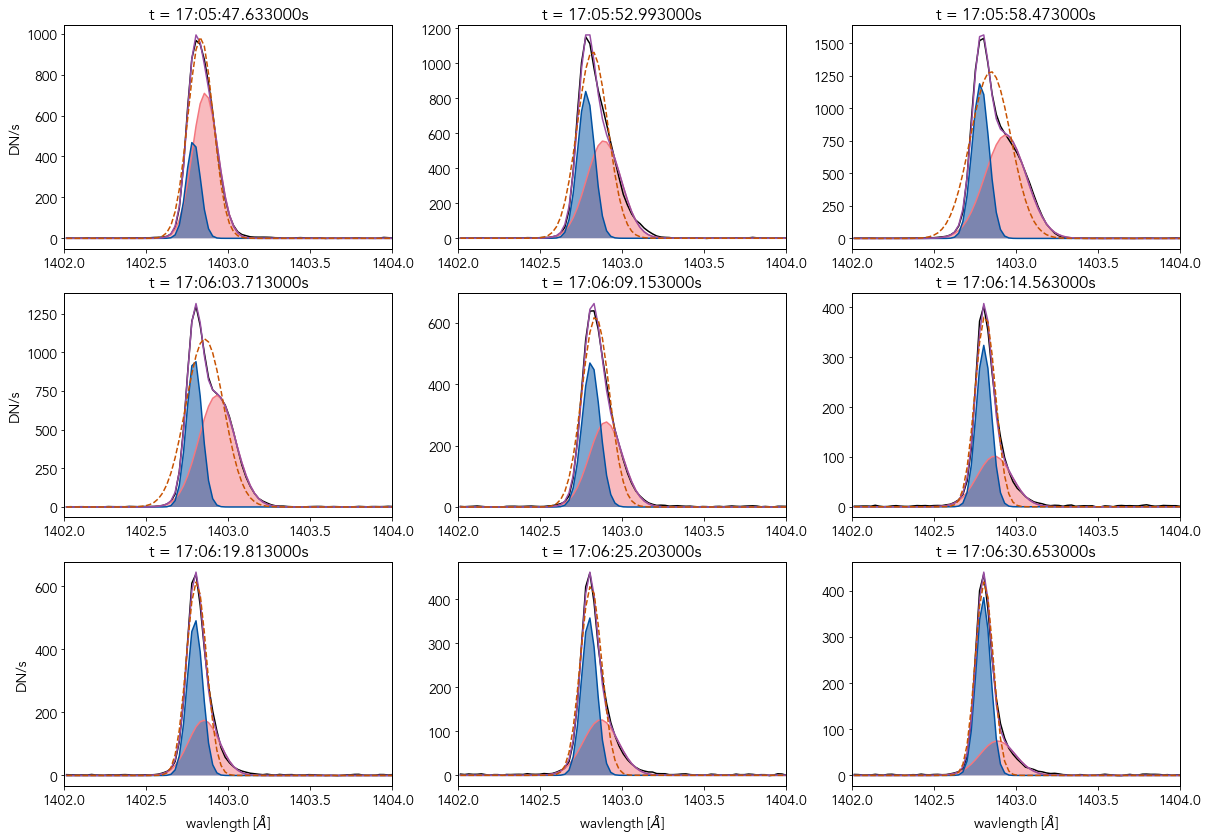

In [68]:
# plot 
import matplotlib.ticker as ticker
fig = plt.figure(figsize=(20,14))
gs = gridspec.GridSpec(3,3)

for j in range(0,nn):

    k = ts[j]
    
    y2a = y2a_arr[k]
    y2b = y2b_arr[k]
    y1g = y1g_arr[k]
    dat = datr[k]



    ax1 = fig.add_subplot(gs[j])
    # spectrum
    ax1.plot(wvl, dat, color = 'black')
    # peak 1
    ax1.plot(wvl, y2a, color = clrs[3])
    ax1.fill_between(wvl, y2a.min(), y2a, facecolor= clrs[3], alpha=0.5)
    # peak 2
    ax1.plot(wvl, y2b, color = clrs[0])
    ax1.fill_between(wvl, y2b.min(), y2b, facecolor= clrs[0], alpha=0.5) 
    #both
    ax1.plot(wvl,y2a+y2b, color = clrs2[5])
    # single fit
    ax1.plot(wvl,y1g,'--',color=clrs3[5])

    ax1.set_xlim(1402.,1404.)
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    #ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
    #ax1.set_title('t = '+str(it[k]))
    ax1.set_title('t = '+dts[it[k]]+'s')

ax0 = fig.add_subplot(gs[0])
ax0.set_ylabel('DN/s')
ax2 = fig.add_subplot(gs[3])
ax2.set_ylabel('DN/s')
ax6= fig.add_subplot(gs[6])
ax6.set_ylabel('DN/s')
ax6.set_xlabel("wavlength [$\AA$]")
ax7 = fig.add_subplot(gs[7])
ax7.set_xlabel("wavlength [$\AA$]")
ax8 = fig.add_subplot(gs[8])
ax8.set_xlabel("wavlength [$\AA$]")

fig.savefig('iris_fit_all.png', format='png',facecolor='w', edgecolor='w', dpi = 1000)

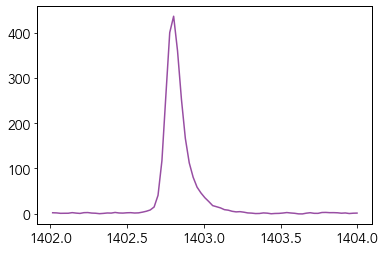

(-25566.300619178244, -25566.29937832176)

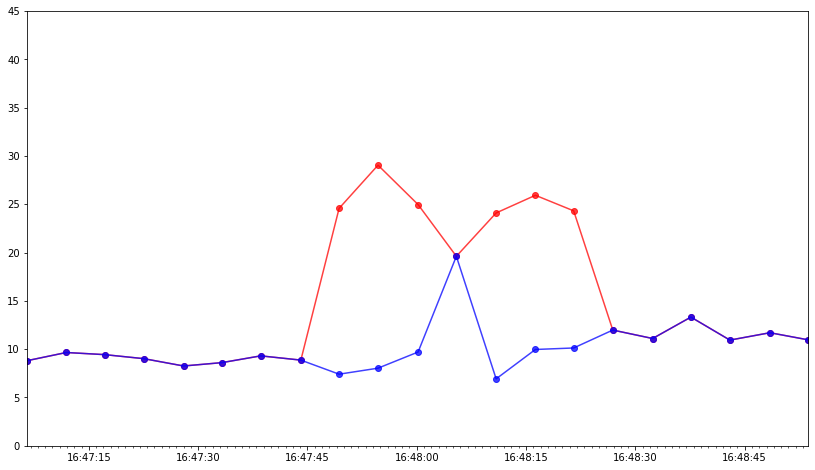

In [17]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot_date(tm_d[it],v_r,'r',alpha=0.75,marker='o')
ax.plot_date(tm_d[it],v_b,'b',alpha=0.75,marker='o')
ax.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))
ax.xaxis.set_minor_locator(date.SecondLocator())
#ax.xaxis.set_minor_formatter(date.DateFormatter('0.%f'))
ax.set_ylim(0,45)
plt.xlim(1215,1235)
ax.set_xlim([tmp[1215], tmp[1235]])

In [18]:
ts = np.arange(1220,1232)-1200
nn = len(ts)
nn

12

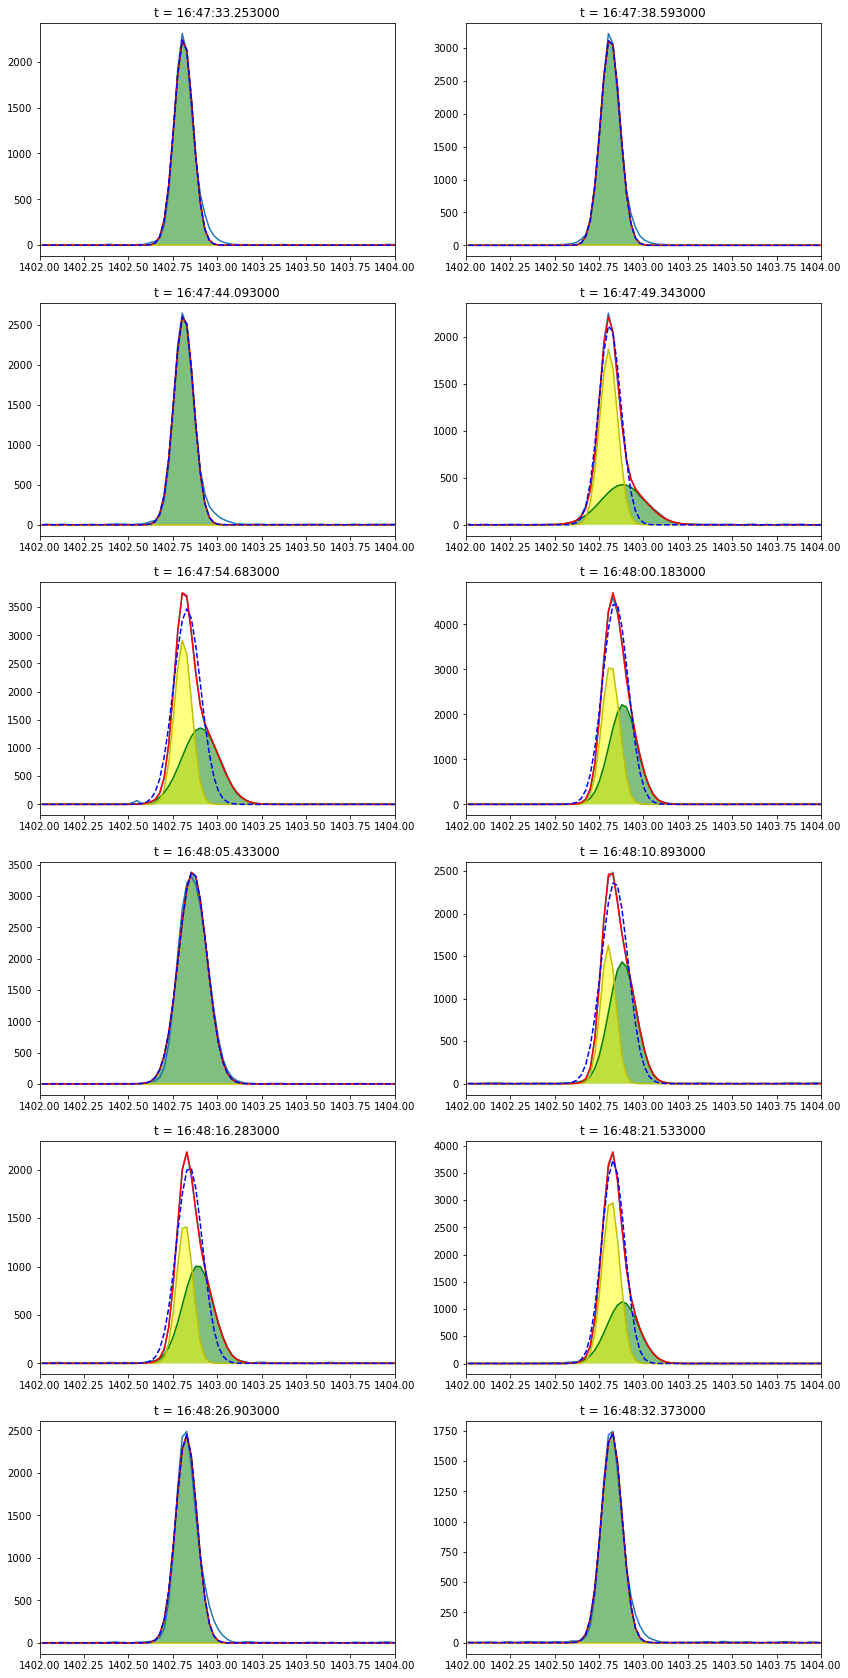

In [19]:
# plot 
fig = plt.figure(figsize=(14,30))
gs = gridspec.GridSpec(6,2)

for j in range(0,nn):

    k = ts[j]
    
    y2a = y2a_arr[k]
    y2b = y2b_arr[k]
    y1g = y1g_arr[k]
    dat = datr[k]

    ax1 = fig.add_subplot(gs[j])
    # spectrum
    ax1.plot(wvl, dat)
    # peak 1
    ax1.plot(wvl, y2a, "g")
    ax1.fill_between(wvl, y2a.min(), y2a, facecolor="green", alpha=0.5)
    # peak 2
    ax1.plot(wvl, y2b, "y")
    ax1.fill_between(wvl, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 
    #both
    ax1.plot(wvl,y2a+y2b, "r")
    # single fit
    ax1.plot(wvl,y1g,'b--')

    ax1.set_xlim(1402.,1404.)
   # ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
    ax1.set_title('t = '+dts[it[k]])

(-25566.283545335646, -25566.281682604164)

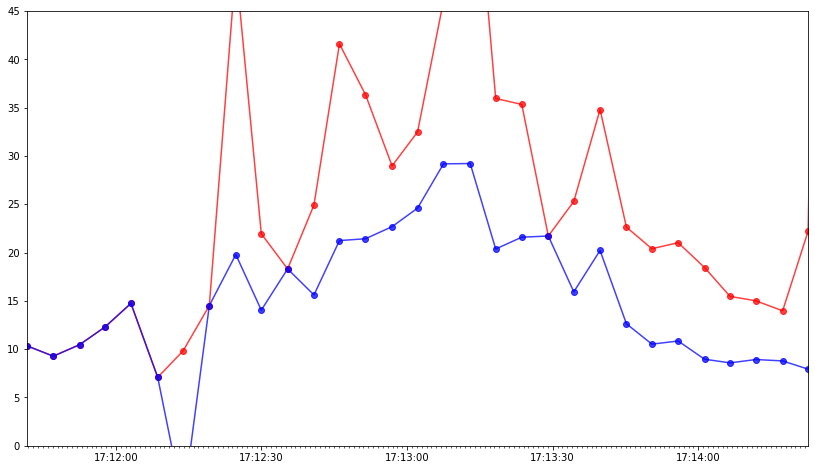

In [20]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot_date(tm_d[it],v_r,'r',alpha=0.75,marker='o')
ax.plot_date(tm_d[it],v_b,'b',alpha=0.75,marker='o')
ax.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))
ax.xaxis.set_minor_locator(date.SecondLocator())
#ax.xaxis.set_minor_formatter(date.DateFormatter('0.%f'))
ax.set_ylim(0,45)
ax.set_xlim([tmp[1490], tmp[1520]])

In [21]:
ts = np.arange(1494,1520)-1200
nn = len(ts)
nn

26

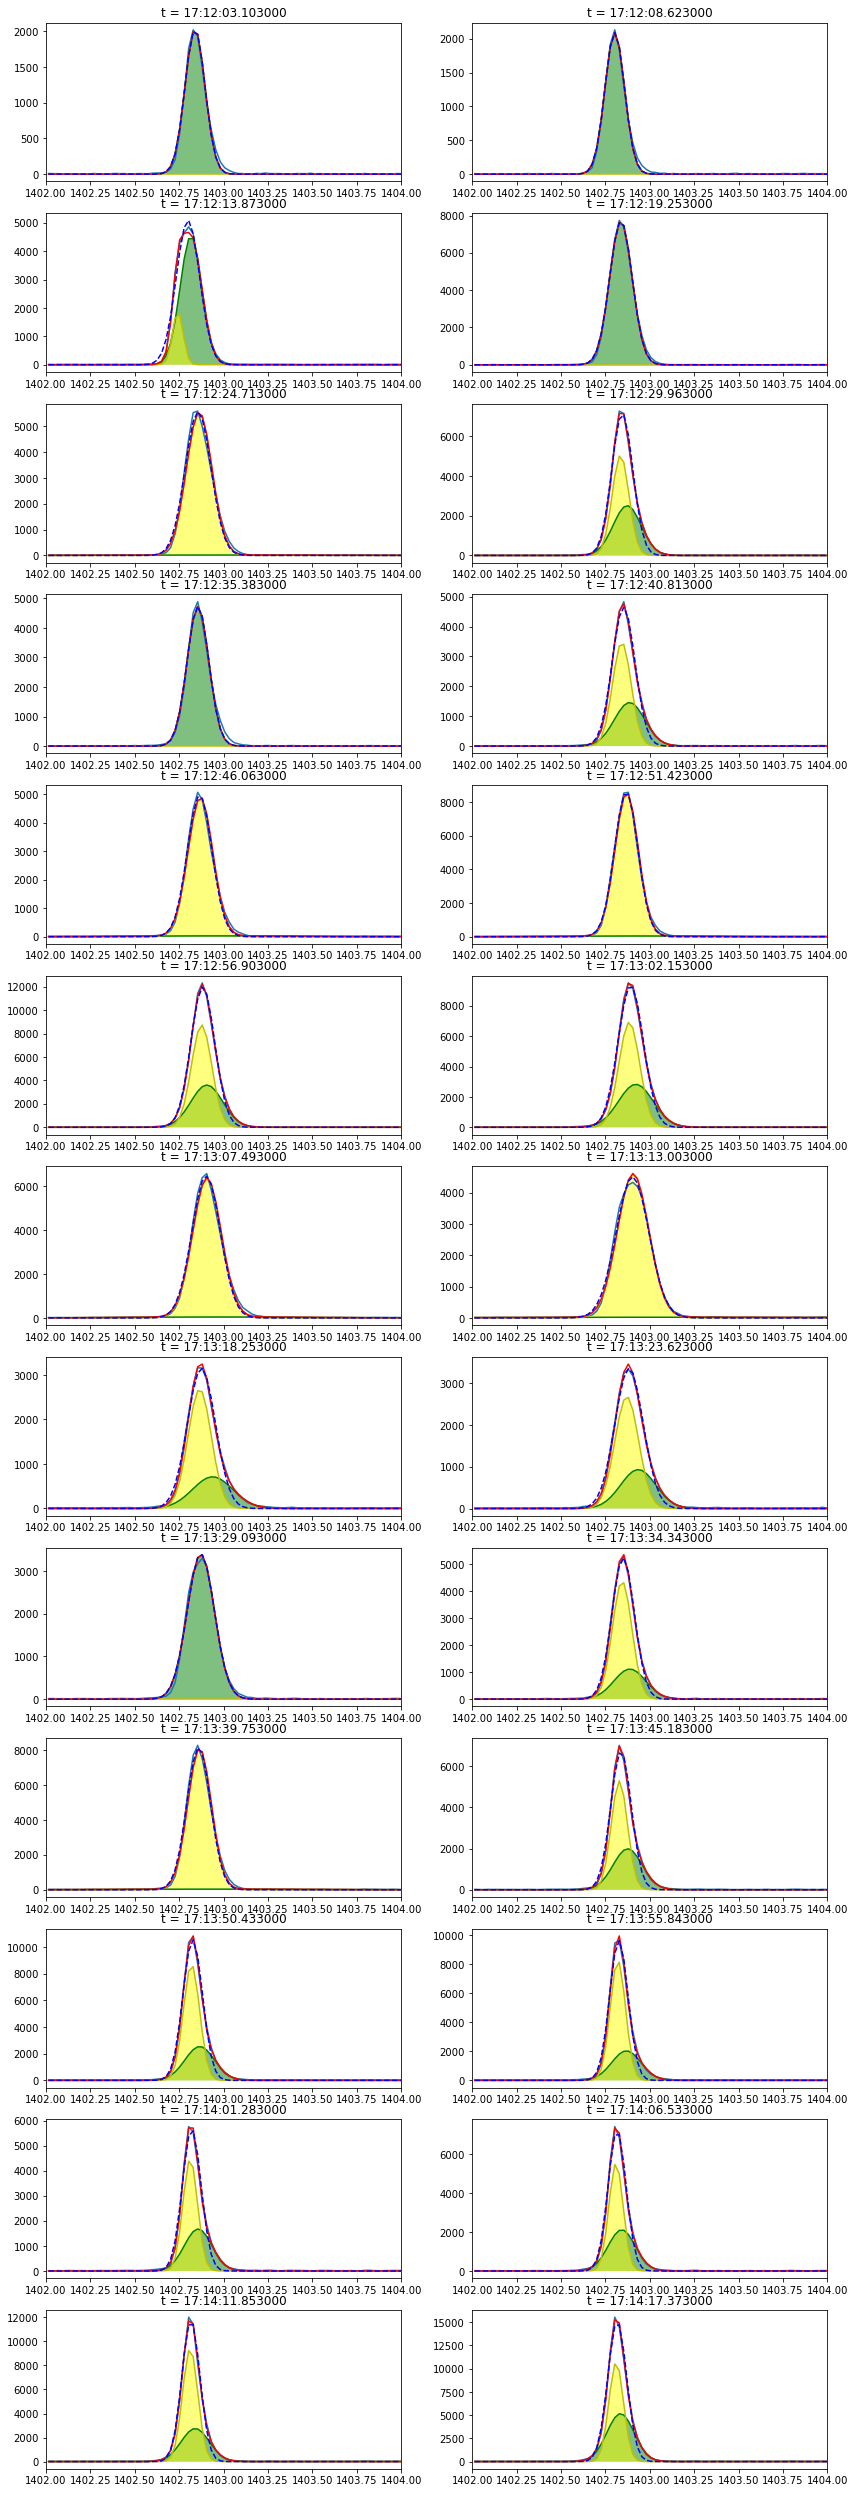

In [22]:
# plot 
fig = plt.figure(figsize=(14,45))
gs = gridspec.GridSpec(13,2)

for j in range(0,nn):

    k = ts[j]
    
    y2a = y2a_arr[k]
    y2b = y2b_arr[k]
    y1g = y1g_arr[k]
    dat = datr[k]



    ax1 = fig.add_subplot(gs[j])
    # spectrum
    ax1.plot(wvl, dat)
    # peak 1
    ax1.plot(wvl, y2a, "g")
    ax1.fill_between(wvl, y2a.min(), y2a, facecolor="green", alpha=0.5)
    # peak 2
    ax1.plot(wvl, y2b, "y")
    ax1.fill_between(wvl, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 
    #both
    ax1.plot(wvl,y2a+y2b, "r")
    # single fit
    ax1.plot(wvl,y1g,'b--')

    ax1.set_xlim(1402.,1404.)
   # ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
    ax1.set_title('t = '+dts[it[k]])

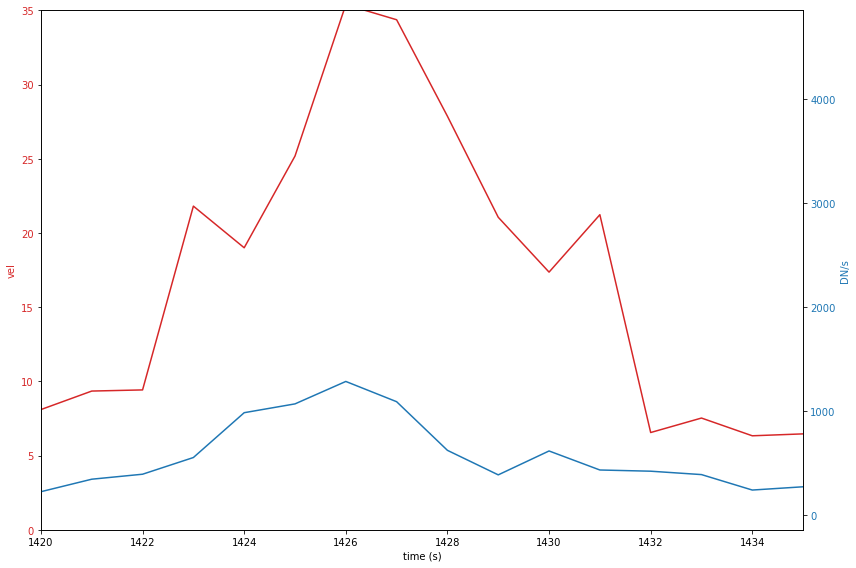

In [23]:
fig, ax1 = plt.subplots(figsize = (12,8))

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('vel', color=color)
ax1.plot(it,v_r, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.set_xlim(1420,1435)
ax1.set_ylim(0,35)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('DN/s', color=color)  # we already handled the x-label with ax1
ax2.plot(it,amp/4., color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

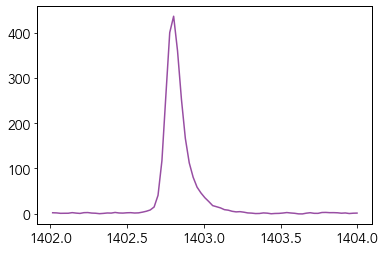

In [66]:
plt.plot(wvl,dat,color = clrs2[5])